<a href="https://colab.research.google.com/github/ulyana2002/neural-networks-/blob/main/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F%20%D1%81%D0%B5%D1%82%D1%8C.%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20%D1%81%D0%BE%D0%B1%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE%20DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
import os
from sklearn.model_selection import train_test_split
from PIL import Image 
import matplotlib.pyplot as plt
import gc
from google.colab import drive
import pathlib

In [75]:
from google.colab import drive
!unzip /content/drive/MyDrive/dataset1.zip -d /content/data

Archive:  /content/drive/MyDrive/dataset1.zip
  inflating: /content/data/dataset1/man1/man_1 (1).jpg  
  inflating: /content/data/dataset1/man1/man_1 (10).jpg  
  inflating: /content/data/dataset1/man1/man_1 (100).jpg  
  inflating: /content/data/dataset1/man1/man_1 (101).jpg  
  inflating: /content/data/dataset1/man1/man_1 (102).jpg  
  inflating: /content/data/dataset1/man1/man_1 (103).jpg  
  inflating: /content/data/dataset1/man1/man_1 (104).jpg  
  inflating: /content/data/dataset1/man1/man_1 (105).jpg  
  inflating: /content/data/dataset1/man1/man_1 (106).jpg  
  inflating: /content/data/dataset1/man1/man_1 (107).jpg  
  inflating: /content/data/dataset1/man1/man_1 (108).jpg  
  inflating: /content/data/dataset1/man1/man_1 (109).jpg  
  inflating: /content/data/dataset1/man1/man_1 (11).jpg  
  inflating: /content/data/dataset1/man1/man_1 (110).jpg  
  inflating: /content/data/dataset1/man1/man_1 (111).jpg  
  inflating: /content/data/dataset1/man1/man_1 (112).jpg  
  inflating: /

In [6]:
height = 256
width = 256

In [7]:
images = []
y = []

classes = ['woman1', 'man1']
i = 0.0
for cl in classes:
  path = '/content/data/dataset1/' + cl
  files = os.listdir(path)
  for img in files:
    im = Image.open(path+'/'+img).convert('RGB')
    Size = im.resize((height, width), Image.ANTIALIAS)
    images.append(np.array(Size))
    y.append(i)
  i = i + 1.0

images = np.array(images) / 255.0
y = np.array(y)



In [8]:
x_train, x_test, y_train, y_test = train_test_split(images, y,
                                                    stratify=y, 
                                                    test_size=0.2)

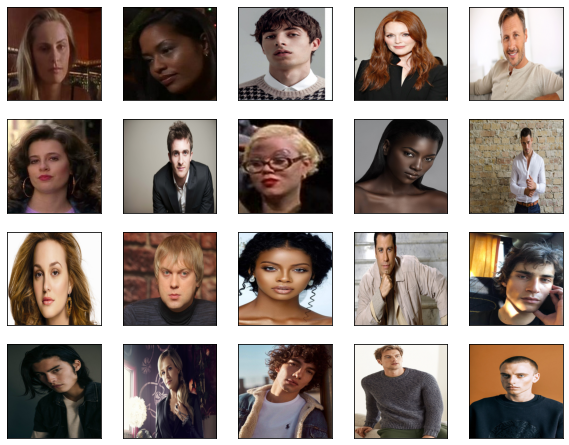

In [9]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)

plt.show()

In [10]:
model = tf.keras.Sequential([
                             
  tf.keras.layers.Input(shape=(256, 256, 3)),

  tf.keras.layers.Conv2D(8, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2, padding = 'same'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(16, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2, padding = 'same'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(32, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2, padding = 'same'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(64, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2, padding = 'same'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(128, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2, padding = 'same'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(256, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=2, padding = 'same'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 8)       104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 8)      32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 16)      528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                        

In [11]:
model.compile(
    optimizer ='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


In [21]:
hist = model.fit(
  x_train,
  y_train,
  validation_data=(x_test, y_test),
  validation_split=0.2,
  epochs=100
)


Epoch 1/100
55/55 [==============================] - 44s 806ms/step - loss: 0.3678 - accuracy: 0.8495 - val_loss: 1.4573 - val_accuracy: 0.5594
Epoch 2/100
55/55 [==============================] - 43s 782ms/step - loss: 0.2945 - accuracy: 0.8827 - val_loss: 0.6322 - val_accuracy: 0.7032
Epoch 3/100
55/55 [==============================] - 42s 762ms/step - loss: 0.2289 - accuracy: 0.9119 - val_loss: 0.6001 - val_accuracy: 0.7215
Epoch 4/100
55/55 [==============================] - 42s 761ms/step - loss: 0.1858 - accuracy: 0.9291 - val_loss: 0.9738 - val_accuracy: 0.7009
Epoch 5/100
55/55 [==============================] - 43s 782ms/step - loss: 0.1974 - accuracy: 0.9251 - val_loss: 0.4904 - val_accuracy: 0.8037
Epoch 6/100
55/55 [==============================] - 42s 774ms/step - loss: 0.1262 - accuracy: 0.9537 - val_loss: 0.6161 - val_accuracy: 0.7922
Epoch 7/100
55/55 [==============================] - 42s 761ms/step - loss: 0.0811 - accuracy: 0.9760 - val_loss: 0.4198 - val_accuracy:

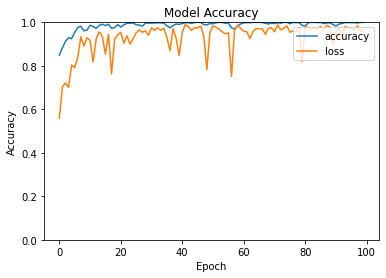

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.legend(['accuracy', 'loss'], loc = 'upper right')

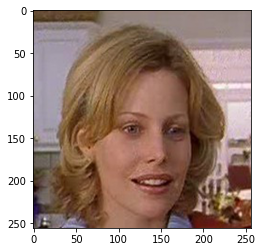

1/1 [==============================] - 0s 27ms/step

It is woman1


In [53]:
numbers = 100

imge = x_test[numbers]

def plot_image(pixels: np.array):
    plt.imshow(pixels.reshape(256, 256, 3), cmap='gray')
    plt.show()
plot_image(imge)
imge.shape


predictions = model.predict(np.expand_dims(x_test[numbers], 0))
cur = predictions[0][0]
cur_num = 0
for i in range(len(classes)):
  if cur < predictions[0][i]:
    cur = predictions[0][i]
    cur_num = i
print(f"\nIt is {classes[cur_num]}")


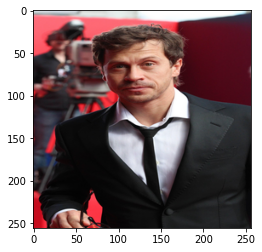

1/1 [==============================] - 0s 26ms/step

It is man1


In [54]:
numbers = 55

imge = x_test[numbers]

def plot_image(pixels: np.array):
    plt.imshow(pixels.reshape(256, 256, 3), cmap='gray')
    plt.show()
plot_image(imge)
imge.shape


predictions = model.predict(np.expand_dims(x_test[numbers], 0))
cur = predictions[0][0]
cur_num = 0
for i in range(len(classes)):
  if cur < predictions[0][i]:
    cur = predictions[0][i]
    cur_num = i
print(f"\nIt is {classes[cur_num]}")

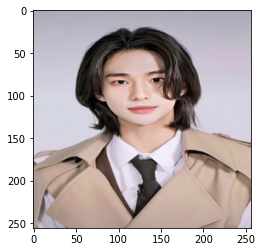

1/1 [==============================] - 0s 29ms/step

It is man1


In [55]:
numbers = 235

imge = x_test[numbers]

def plot_image(pixels: np.array):
    plt.imshow(pixels.reshape(256, 256, 3), cmap='gray')
    plt.show()
plot_image(imge)
imge.shape


predictions = model.predict(np.expand_dims(x_test[numbers], 0))
cur = predictions[0][0]
cur_num = 0
for i in range(len(classes)):
  if cur < predictions[0][i]:
    cur = predictions[0][i]
    cur_num = i
print(f"\nIt is {classes[cur_num]}")

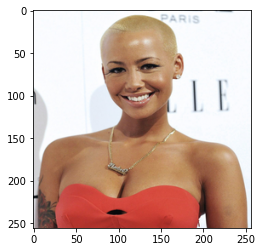

1/1 [==============================] - 0s 33ms/step

It is woman1


In [71]:
numbers = 336

imge = x_test[numbers]

def plot_image(pixels: np.array):
    plt.imshow(pixels.reshape(256, 256, 3), cmap='gray')
    plt.show()
plot_image(imge)
imge.shape


predictions = model.predict(np.expand_dims(x_test[numbers], 0))
cur = predictions[0][0]
cur_num = 0
for i in range(len(classes)):
  if cur < predictions[0][i]:
    cur = predictions[0][i]
    cur_num = i
print(f"\nIt is {classes[cur_num]}")